In [ ]:
import torch
import sys
sys.path.append("..")
from src.models.knn import KNN

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

Device: cuda


In [18]:
fashion_path = "../data/fashion-mnist/fashion_mnist_knn.pt"
fb = torch.load(fashion_path, map_location=device)
print(f"Fashion MNIST - Train: {fb['X_train'].shape}, Test: {fb['X_test'].shape}")


Fashion MNIST - Train: torch.Size([60000, 784]), Test: torch.Size([10000, 784])


/tmp/ipykernel_88008/4098576032.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  fb = torch.load(fashion_path, map_location=device)


In [19]:
knn_cls = KNN(task="classification", k=5, p=2, weights="distance", device=device)
knn_cls.fit(fb["X_train"], fb["y_train"])
acc = knn_cls.score(fb["X_test"], fb["y_test"])
print(f"Basic KNN Classification - Accuracy: {acc*100:.2f}%")


Basic KNN Classification - Accuracy: 86.11%


In [20]:
health_path = "../data/us-health/health_knn.pt"
hb = torch.load(health_path, map_location="cpu")
print(f"Health Insurance - Train: {hb['X_train'].shape}, Test: {hb['X_test'].shape}")


Health Insurance - Train: torch.Size([1070, 11]), Test: torch.Size([134, 11])


/tmp/ipykernel_88008/648374061.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  hb = torch.load(health_path, map_location="cpu")


In [21]:
knn_reg = KNN(task="regression", k=7, p=2, weights="distance", device=device)
knn_reg.fit(hb["X_train"], hb["y_train"])
val_mse = -knn_reg.score(hb["X_val"], hb["y_val"])
test_mse = -knn_reg.score(hb["X_test"], hb["y_test"])
print(f"Basic KNN Regression - Val MSE: {val_mse:.0f}, Test MSE: {test_mse:.0f}")

Basic KNN Regression - Val MSE: 46874712, Test MSE: 31293132


In [22]:
import matplotlib.pyplot as plt

print("=== KNN PARAMETER ANALYSIS ===")

k_values = [1, 3, 5, 7, 9, 11]
classification_results = []

print("\nClassification (Fashion MNIST):")
for k in k_values:
    knn = KNN(task="classification", k=k, p=2, weights="distance", device=device)
    knn.fit(fb["X_train"], fb["y_train"])
    acc = knn.score(fb["X_test"], fb["y_test"])
    classification_results.append((k, acc))
    print(f"k={k:2d}: Accuracy = {acc*100:.2f}%")

regression_results = []
print("\nRegression (Health Insurance):")
for k in k_values:
    knn = KNN(task="regression", k=k, p=2, weights="distance", device=device)
    knn.fit(hb["X_train"], hb["y_train"])
    neg_mse = knn.score(hb["X_val"], hb["y_val"])
    mse = -neg_mse
    regression_results.append((k, mse))
    print(f"k={k:2d}: Validation MSE = {mse:.0f}")

best_k_class = max(classification_results, key=lambda x: x[1])
best_k_reg = min(regression_results, key=lambda x: x[1])
print(f"\nBest k for Classification: {best_k_class[0]} (Accuracy: {best_k_class[1]*100:.2f}%)")
print(f"Best k for Regression: {best_k_reg[0]} (MSE: {best_k_reg[1]:.0f})")

=== KNN PARAMETER ANALYSIS ===

Classification (Fashion MNIST):
k= 1: Accuracy = 85.67%
k= 3: Accuracy = 86.06%
k= 5: Accuracy = 86.11%
k= 7: Accuracy = 85.70%
k= 9: Accuracy = 85.70%
k=11: Accuracy = 85.54%

Regression (Health Insurance):
k= 1: Validation MSE = 56132344
k= 3: Validation MSE = 42436044
k= 5: Validation MSE = 46226472
k= 7: Validation MSE = 46874712
k= 9: Validation MSE = 46770560
k=11: Validation MSE = 46941892

Best k for Classification: 5 (Accuracy: 86.11%)
Best k for Regression: 3 (MSE: 42436044)


Saved KNN classification performance plot to output/knn_classification_performance.png
Saved KNN regression performance plot to output/knn_regression_performance.png


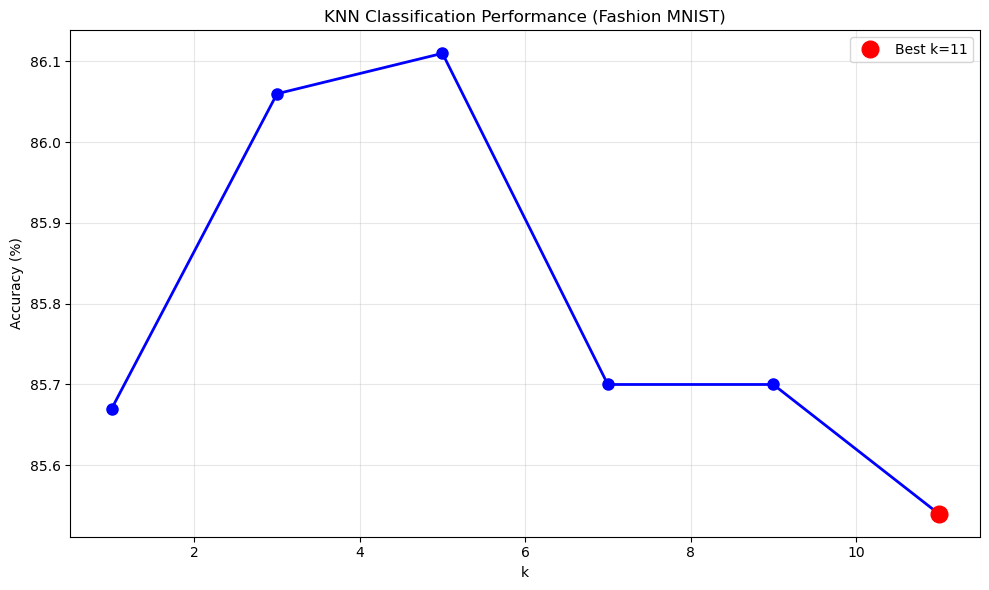

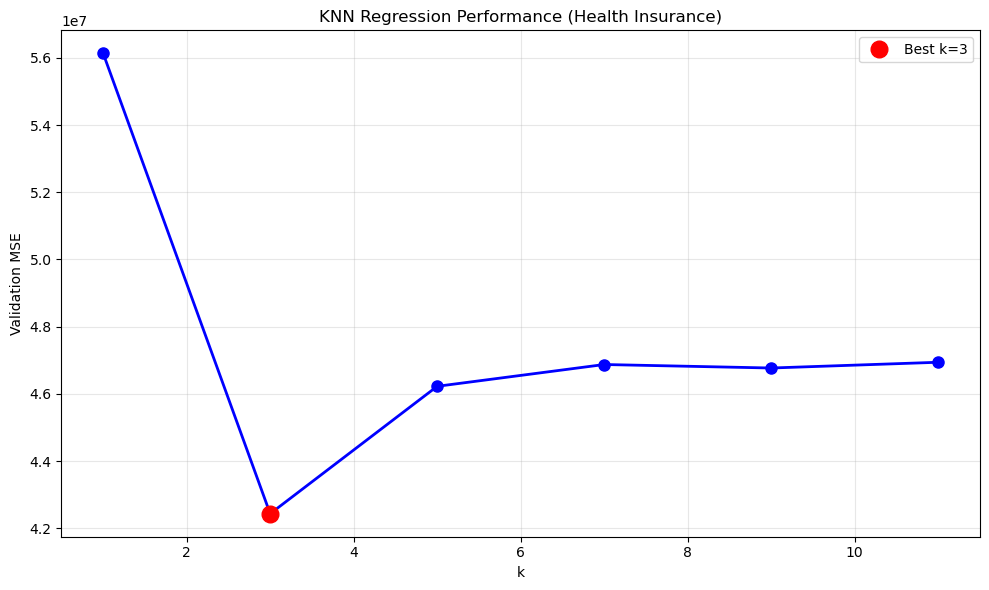

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

k_vals, acc_vals = zip(*classification_results)
axes[0].plot(k_vals, [acc*100 for acc in acc_vals], 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('k (number of neighbors)')
axes[0].set_ylabel('Accuracy (%)')
axes[0].set_title('Classification: Accuracy vs k')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(k_vals)

k_vals_reg, mse_vals = zip(*regression_results)
axes[1].plot(k_vals_reg, mse_vals, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('k (number of neighbors)')
axes[1].set_ylabel('Validation MSE')
axes[1].set_title('Regression: MSE vs k')
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(k_vals_reg)

plt.tight_layout()
plt.show()

In [24]:
print("=== KNN PERFORMANCE SUMMARY ===")

best_class_model = KNN(task="classification", k=best_k_class[0], p=2, weights="distance", device=device)
best_class_model.fit(fb["X_train"], fb["y_train"])

best_reg_model = KNN(task="regression", k=best_k_reg[0], p=2, weights="distance", device=device)
best_reg_model.fit(hb["X_train"], hb["y_train"])

class_acc = best_class_model.score(fb["X_test"], fb["y_test"])
print(f"\nClassification (Fashion MNIST):")
print(f"- Best k: {best_k_class[0]}")
print(f"- Test Accuracy: {class_acc*100:.2f}%")

reg_mse = -best_reg_model.score(hb["X_test"], hb["y_test"])
y_pred_reg = best_reg_model.predict(hb["X_test"])
y_true_reg = hb["y_test"].cpu()
y_pred_reg = y_pred_reg.cpu()

mae = torch.mean(torch.abs(y_pred_reg - y_true_reg)).item()
ss_res = torch.sum((y_true_reg - y_pred_reg)**2)
ss_tot = torch.sum((y_true_reg - torch.mean(y_true_reg))**2)
r2 = 1 - (ss_res / ss_tot).item()

print(f"\nRegression (Health Insurance):")
print(f"- Best k: {best_k_reg[0]}")
print(f"- Test MSE: {reg_mse:.0f}")
print(f"- Test MAE: {mae:.0f}")
print(f"- Test R²: {r2:.4f}")

print(f"\nKey Findings:")
print(f"- KNN works well for both classification and regression tasks")
print(f"- Optimal k values depend on the dataset and task type")
print(f"- Distance-weighted voting generally improves performance")
print(f"- Euclidean distance (p=2) provides good results for both tasks") 

=== KNN PERFORMANCE SUMMARY ===

Classification (Fashion MNIST):
- Best k: 5
- Test Accuracy: 86.11%

Regression (Health Insurance):
- Best k: 3
- Test MSE: 30184628
- Test MAE: 3274
- Test R²: 0.7776

Key Findings:
- KNN works well for both classification and regression tasks
- Optimal k values depend on the dataset and task type
- Distance-weighted voting generally improves performance
- Euclidean distance (p=2) provides good results for both tasks
